Airflow allows you to define pipelines or workflows as DAGs of tasks. You define your DAG using python code in DAG files, which are essentially python scripts that describe the structure of the corresponding DAG. As such, each DAG file typically describes the set of tasks for a given DAG and the dependencies between the tasks, which airflow then parses to identify the structure. <br>

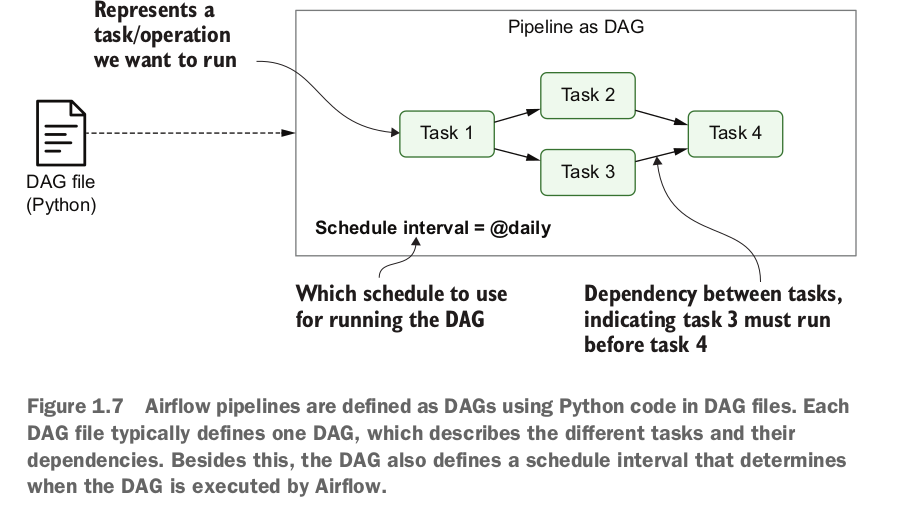

<br>
Airflow is organized into 3 main components:
* **The airflow scheduler-** Parses DAGs, check their schedule interval, and (if the DAG's schedule has passed) starts scheduling the DAG's tasks for execution by passing them to the airflow workers
* **The airflow workers-** Pick up the tasks that are scheduled for execution and execute them. As such, the workers are responsible for doing the actual work
* **The airflow webserver-** Visualizes the DAGs parsed by the scheduler and provides the main interface for users to monitor DAG runs and their results

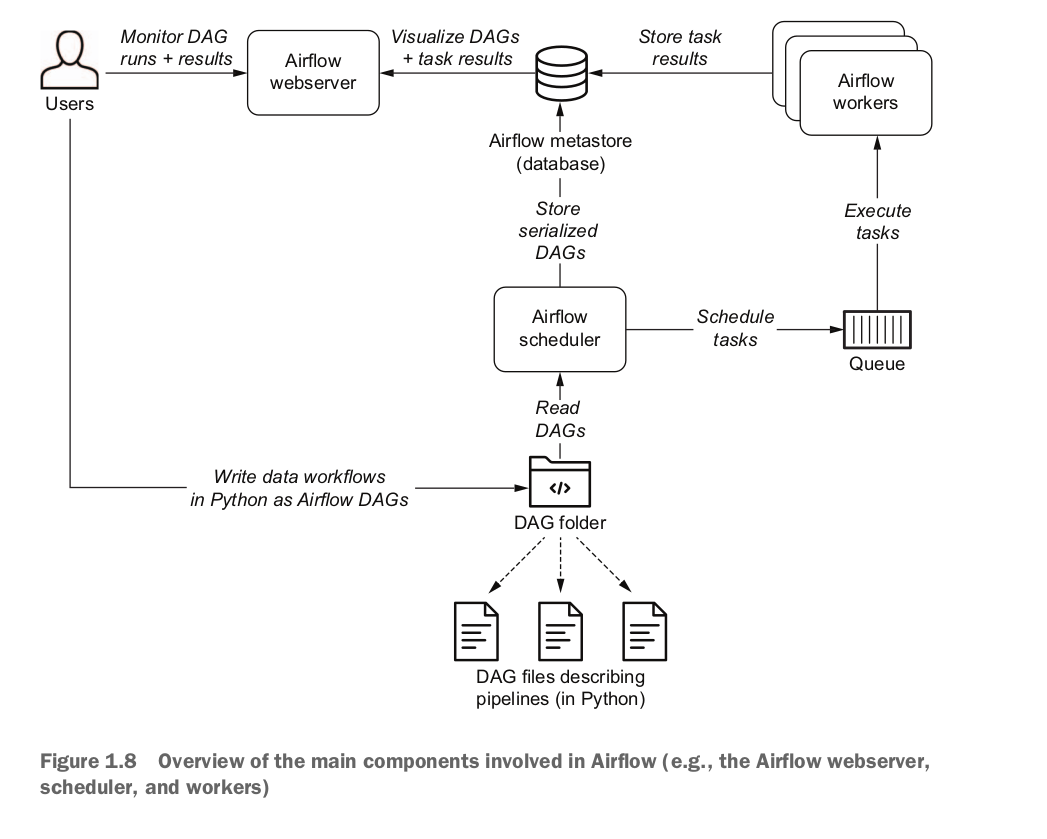

At a higher level, the scheduler runs through the following steps:
1. Once the users have written their workflows as DAGs, the files containing these DAGs are read by the scheduler to extract the corresponding tasks, dependencies and the schedule intervals
2. For each DAG, the scheduler then checks whether the schedule interval for the DAG has passed since the last time it was read. If so, the tasks in the DAG are scheduled for execution
3. For each scheduled tasks, the scheduler then checks whether the dependencies of the tasks have been completed. If so, the task is added to the execution queue
4. The scheduler waits for several moments before starting a new loop by jumping to step 1

## Reasons not to use airflow
1. Handling streaming pipelines, as airflow is primarily designed to run recurring or batch-oriented tasks, rather than streaming workloads
2. Implementing highly dynamic pipelines, in which tasks are adeded/removed between every pipeline run. Although airflow can implement this kind of behavior, the web interface will only show tasks that are still defined in the most recent version of the DAG